In [ ]:
# Rule Based Model Exploration

In [1]:
import pandas as pd
import numpy as np
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from itertools import combinations
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

## Load data

In [2]:
df = pd.read_csv('Data/p7_master_window.csv')
df.fillna(value=0, inplace=True)

In [3]:
df['engagement'].value_counts()

1.0    12029
0.0     8097
Name: engagement, dtype: int64

In [4]:
len_df = len(df)
split_ratio = 0.8
split = int(split_ratio * len_df)

In [5]:
df.iloc[split:,:]['engagement'].value_counts()

0.0    2094
1.0    1932
Name: engagement, dtype: int64

## Rule based model: Open Face Success

In [6]:
train_df, test_df = df.iloc[:split,:], df.iloc[split:,:]
pred = []
for item in test_df.iterrows():
    if item[1]['of_success'] == 0:
        pred.append(0)
    else:
        pred.append(1)
pred = [0 if i[1]['of_success'] == 0 else 1 for i in test_df.iterrows()]

In [7]:
print(classification_report(test_df['engagement'], pred))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      2094
         1.0       0.92      0.72      0.81      1932

   micro avg       0.83      0.83      0.83      4026
   macro avg       0.85      0.83      0.83      4026
weighted avg       0.85      0.83      0.83      4026



In [8]:
print("Accuracy Score:", accuracy_score(test_df['engagement'], pred))

Accuracy Score: 0.8340784898161947


### Probablity - Open Face Success

In [9]:
df_rule = df[['of_success', 'engagement']]
count_dict = {}

In [10]:
for row in df_rule.iterrows():
    try:
        count_dict[(row[1]['of_success'], row[1]['engagement'])] += 1
    except:
        count_dict[(row[1]['of_success'], row[1]['engagement'])] = 1

In [11]:
print(count_dict)
print((count_dict[(0.0, 0.0)] + count_dict[(0.0, 1.0)]) / sum(list(count_dict.values())))
prob_o0_e0 = count_dict[(0.0, 0.0)] / (count_dict[(0.0, 0.0)] + count_dict[(0.0, 1.0)])
print(prob_o0_e0)
prob_o0_e1 = count_dict[(0.0, 1.0)] / (count_dict[(0.0, 0.0)] + count_dict[(0.0, 1.0)])
print(prob_o0_e1)
prob_o1_e0 = count_dict[(1.0, 0.0)] / (count_dict[(1.0, 0.0)] + count_dict[(1.0, 1.0)])
print(prob_o1_e0)
prob_o1_e1 = count_dict[(1.0, 1.0)] / (count_dict[(1.0, 0.0)] + count_dict[(1.0, 1.0)])
print(prob_o1_e1)

{(0.0, 0.0): 5042, (1.0, 1.0): 8477, (0.0, 1.0): 3552, (1.0, 0.0): 3055}
0.42700983802047104
0.5866883872469164
0.41331161275308353
0.26491501907735
0.7350849809226501


In [12]:
prob_pred = [prob_o0_e1 if i[1]['of_success'] == 0 else prob_o1_e1 for i in df_rule.iterrows()]

In [13]:
# Compute ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(df_rule['engagement'], prob_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

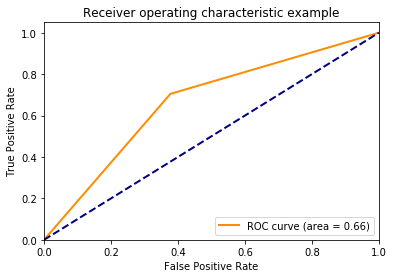

In [14]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [15]:
pred_list = [0 if val < 0.4 else 1 for val in prob_pred]
print(classification_report(df_rule['engagement'], pred_list))
print(accuracy_score(df_rule['engagement'], pred_list))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      8097
         1.0       0.60      1.00      0.75     12029

   micro avg       0.60      0.60      0.60     20126
   macro avg       0.30      0.50      0.37     20126
weighted avg       0.36      0.60      0.45     20126

0.597684587101262


/home/bala/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
pred_list = [0 if val < 0.6 else 1 for val in prob_pred]
print(classification_report(df_rule['engagement'], pred_list))
print(accuracy_score(df_rule['engagement'], pred_list))

              precision    recall  f1-score   support

         0.0       0.59      0.62      0.60      8097
         1.0       0.74      0.70      0.72     12029

   micro avg       0.67      0.67      0.67     20126
   macro avg       0.66      0.66      0.66     20126
weighted avg       0.68      0.67      0.67     20126

0.6717181754943854


In [17]:
pred_list = [0 if val < 0.75 else 1 for val in prob_pred]
print(classification_report(df_rule['engagement'], pred_list))
print(accuracy_score(df_rule['engagement'], pred_list))

              precision    recall  f1-score   support

         0.0       0.40      1.00      0.57      8097
         1.0       0.00      0.00      0.00     12029

   micro avg       0.40      0.40      0.40     20126
   macro avg       0.20      0.50      0.29     20126
weighted avg       0.16      0.40      0.23     20126

0.40231541289873796


It can be observed that varying the threshold changes the accuracy.

## Rule based model

In [18]:
# Code for converting the numerical variables into categorical by binning them
df_rules = df[['op_num_people', 'of_pose_distance', 'of_gaze_distance', 'of_success', 'of_confidence', 'ros_difficulty', 'ros_mistakes_session', 'ros_ts_robot_talked']]

def calc(df):
    min_df = min(df)
    max_df = max(df)
    diff_df = (max_df - min_df) / 10
    list_df = []
    base_df = min_df
    for i in range(11):
        list_df.append(base_df)
        base_df = base_df + diff_df
    return list_df

In [19]:
pose_dist_list = calc(df_rules['of_pose_distance'])
gaze_dist_list = calc(df_rules['of_gaze_distance'])
confidence_list = calc(df_rules['of_confidence'])
ts_talked_list = calc(df_rules['ros_ts_robot_talked'])    

In [20]:
dpose = df_rules['of_pose_distance']
dgaze = df_rules['of_gaze_distance']
dconf = df_rules['of_confidence']
dts = df_rules['ros_ts_robot_talked']

In [21]:
def binv_pose(val, range_list = pose_dist_list):
    for i in range(len(range_list) - 1):
        if val <= range_list[i+1] and val >= range_list[i]:
            return i
    return 0

def binv_gaze(val, range_list = gaze_dist_list):
    for i in range(len(range_list) - 1):
        if val <= range_list[i+1] and val >= range_list[i]:
            return i
    return 0

def binv_conf(val, range_list = confidence_list):
    for i in range(len(range_list) - 1):
        if val <= range_list[i+1] and val >= range_list[i]:
            return i
    return 0

def binv_ts(val, range_list = ts_talked_list):
    for i in range(len(range_list) - 1):
        if val <= range_list[i+1] and val >= range_list[i]:
            return i
    return 0

#map(binv, list(dts))

In [22]:
df_rules['of_pose_distance_bin'] = list(map(binv_pose, list(dpose)))
df_rules['of_gaze_distance_bin'] = list(map(binv_gaze, list(dgaze)))
df_rules['of_confidence_bin'] = list(map(binv_conf, list(dconf)))
df_rules['ros_ts_robot_talked_bin'] = list(map(binv_ts, list(dts)))

/home/bala/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/bala/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bala/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

### Probability Calculation

In [23]:
df_threshold = df_rules[['op_num_people', 'of_pose_distance_bin', 'of_gaze_distance_bin', 'of_success', 'of_confidence_bin', 'ros_difficulty', 'ros_mistakes_session', 'ros_ts_robot_talked_bin']]
df_label = df[['engagement']]
df_threshold_int = df_threshold.astype('int')
df_thresh = pd.concat([df_threshold_int, df_label], axis=1).astype('int')

In [24]:
df_train, df_test = df_thresh.iloc[:split,:], df_threshold_int.iloc[split:,:]

In [25]:
from collections import defaultdict

c_dict = defaultdict(dict) # Count Dict
p_dict = defaultdict(dict) # Probability Dict

feat = ['op_num_people', 'of_pose_distance_bin', 'of_gaze_distance_bin',
       'of_success', 'of_confidence_bin', 'ros_difficulty',
       'ros_mistakes_session', 'ros_ts_robot_talked_bin']

In [26]:
for row in df_train.iterrows():
    for f in feat:
        try:
            c_dict[f][(row[1][f], row[1]['engagement'])] += 1
        except:
            c_dict[f][(row[1][f], row[1]['engagement'])] = 1

In [27]:
# Smoothing Count
mc_dict = copy.deepcopy(c_dict)

In [28]:
for key in c_dict:
    print(key)
    if '_bin' in key:
        for i in range(10):
            if (i,0) not in c_dict[key]:
                #print("Err0", i)
                mc_dict[key][(i,0)] = 1
            if (i,1) not in c_dict[key]:
                #print("Err1", i)
                mc_dict[key][(i,1)] = 1
    else:
        vset = set(map(lambda x: x[0], c_dict[key].keys()))
        for i in vset:
            if (i,0) not in c_dict[key]:
                #print("Err0", i)
                mc_dict[key][(i,0)] = 1
            if (i,1) not in c_dict[key]:
                #print("Err1", i)
                mc_dict[key][(i,1)] = 1            

op_num_people
of_pose_distance_bin
of_gaze_distance_bin
of_success
of_confidence_bin
ros_difficulty
ros_mistakes_session
ros_ts_robot_talked_bin


In [29]:
# Smoothed count dict
mc_dict

defaultdict(dict,
            {'op_num_people': {(0, 0): 3818,
              (1, 0): 1776,
              (1, 1): 7614,
              (2, 1): 1677,
              (0, 1): 473,
              (3, 1): 322,
              (2, 0): 336,
              (4, 1): 11,
              (3, 0): 73,
              (4, 0): 1},
             'of_pose_distance_bin': {(0, 0): 3977,
              (0, 1): 9511,
              (1, 1): 504,
              (5, 1): 20,
              (3, 0): 9,
              (3, 1): 17,
              (4, 1): 12,
              (2, 0): 18,
              (2, 1): 12,
              (8, 0): 317,
              (7, 0): 1477,
              (7, 1): 12,
              (1, 0): 203,
              (8, 1): 4,
              (6, 1): 5,
              (5, 0): 1,
              (4, 0): 1,
              (6, 0): 1,
              (9, 0): 1,
              (9, 1): 1},
             'of_gaze_distance_bin': {(0, 0): 4223,
              (0, 1): 10058,
              (1, 0): 1674,
              (1, 1): 16,
             

In [30]:
for key in mc_dict:
    for tup in mc_dict[key]:
        p_dict[key][tup] = mc_dict[key][tup] / (mc_dict[key][(tup[0], 0)] + mc_dict[key][(tup[0], 1)])

In [31]:
# Probability dict - Shows the naive probabilities of engaged/disengaged given feature.
p_dict

defaultdict(dict,
            {'op_num_people': {(0, 0): 0.8897692845490561,
              (1, 0): 0.1891373801916933,
              (1, 1): 0.8108626198083068,
              (2, 1): 0.8330849478390462,
              (0, 1): 0.11023071545094383,
              (3, 1): 0.8151898734177215,
              (2, 0): 0.16691505216095381,
              (4, 1): 0.9166666666666666,
              (3, 0): 0.1848101265822785,
              (4, 0): 0.08333333333333333},
             'of_pose_distance_bin': {(0, 0): 0.2948546856465006,
              (0, 1): 0.7051453143534994,
              (1, 1): 0.7128712871287128,
              (5, 1): 0.9523809523809523,
              (3, 0): 0.34615384615384615,
              (3, 1): 0.6538461538461539,
              (4, 1): 0.9230769230769231,
              (2, 0): 0.6,
              (2, 1): 0.4,
              (8, 0): 0.9875389408099688,
              (7, 0): 0.9919408999328408,
              (7, 1): 0.008059100067159167,
              (1, 0): 0.2871287128712871

## Thresholding and Prediction

In [32]:
df_test = df_threshold_int.iloc[split:,:]
df_test_label = df_label.iloc[split:,:]

In [33]:
df_test_label.engagement.value_counts()

0.0    2094
1.0    1932
Name: engagement, dtype: int64

In [34]:
'''
Prediction Probability of Engaged(1) = Product of individual probabilites => P (engagement=1/feature=x) 
'''
pred_prob_list = [] # Prediction Probability list 
for item in df_test.iterrows():
    proba = 1
    for k in item[1].keys():
        proba *= p_dict[k][(item[1][k], 1)]
    pred_prob_list.append(proba)

In [35]:
df_test['pred_prob'] = pred_prob_list

/home/bala/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_test.pred_prob.describe()

count    4026.000000
mean        0.032415
std         0.030303
min         0.000021
25%         0.003677
50%         0.025675
75%         0.054398
max         0.100462
Name: pred_prob, dtype: float64

In [37]:
pred_list = list(map(lambda x: 1 if x > 0.02 else 0, pred_prob_list)) # Prediction List with Threshold = 0.02

In [38]:
df_test['pred'] = pred_list

/home/bala/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_test.pred.value_counts()

1    2119
0    1907
Name: pred, dtype: int64

In [40]:
print(classification_report(df_test_label['engagement'], pred_list))
print("Accuracy", accuracy_score(df_test_label['engagement'], pred_list))

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86      2094
         1.0       0.82      0.90      0.86      1932

   micro avg       0.86      0.86      0.86      4026
   macro avg       0.86      0.86      0.86      4026
weighted avg       0.86      0.86      0.86      4026

Accuracy 0.860655737704918


In [41]:
# It is seen that accuracy improves when threshold is varied
pred_list = list(map(lambda x: 1 if x > 0.01 else 0, pred_prob_list))
df_test['pred'] = pred_list
print(classification_report(df_test_label['engagement'], pred_list))
print("Accuracy", accuracy_score(df_test_label['engagement'], pred_list))

              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87      2094
         1.0       0.82      0.97      0.89      1932

   micro avg       0.88      0.88      0.88      4026
   macro avg       0.89      0.88      0.88      4026
weighted avg       0.89      0.88      0.88      4026

Accuracy 0.8805265772478887


/home/bala/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
pred_list = list(map(lambda x: 1 if x > 0.05 else 0, pred_prob_list))
df_test['pred'] = pred_list
print(classification_report(df_test_label['engagement'], pred_list))
print("Accuracy", accuracy_score(df_test_label['engagement'], pred_list))

              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81      2094
         1.0       0.90      0.59      0.71      1932

   micro avg       0.77      0.77      0.77      4026
   macro avg       0.81      0.77      0.76      4026
weighted avg       0.80      0.77      0.76      4026

Accuracy 0.7727272727272727


/home/bala/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The rule-based probability thresholding model (with a good threshold fixed manually) results (using key features for P7) looks promising.

To find: An approach to fix the threshold automatically (maybe using a grid search of continuous values) instead of manually. 